<a href="https://colab.research.google.com/github/Saby049/NLPPractice/blob/main/TensorFlowPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsisu = {} degrees Fahrenhet".format(c,fahrenheit_a[i]))
                     

-40.0 degrees Celsisu = -40.0 degrees Fahrenhet
-10.0 degrees Celsisu = 14.0 degrees Fahrenhet
0.0 degrees Celsisu = 32.0 degrees Fahrenhet
8.0 degrees Celsisu = 46.0 degrees Fahrenhet
15.0 degrees Celsisu = 59.0 degrees Fahrenhet
22.0 degrees Celsisu = 72.0 degrees Fahrenhet
38.0 degrees Celsisu = 100.0 degrees Fahrenhet


In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [ ]:
model = tf.keras.Sequential([l0])


In [ ]:
model.compile(loss='mean_squared_error', optimizer= tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


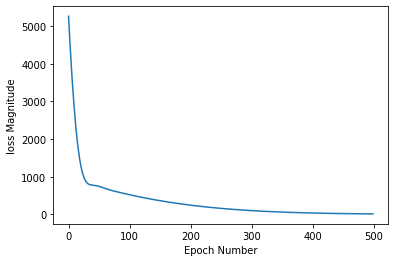

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('loss Magnitude')
plt.plot(history.history['loss'])

In [ ]:
print(model.predict([100.0]))

[[211.30016]]


In [ ]:
print("There are the layer variables: {}".format(l0.get_weights()))

There are the layer variables: [array([[1.8256325]], dtype=float32), array([28.736912], dtype=float32)]


In [ ]:
lo = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("There are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[1.4065517]], dtype=float32), array([26.76788], dtype=float32)]
These are the l1 variables: [array([[ 1.5198444 , -0.6739715 ,  0.56274843,  0.2669809 ]],
      dtype=float32), array([-0.60727835, -1.3400071 ,  1.8803519 ,  1.4160324 ], dtype=float32)]
There are the l2 variables: [array([[ 1.2733142 ],
       [ 0.31480393],
       [-0.617196  ],
       [-0.3651093 ]], dtype=float32), array([0.60866696], dtype=float32)]


In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.3 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)
#tf.enable_eager_execution()

2.8.2


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDQ4E2R/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDQ4E2R/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-Shirts/Top', 'Trouser', 'Pullover', "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle Boot"]

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

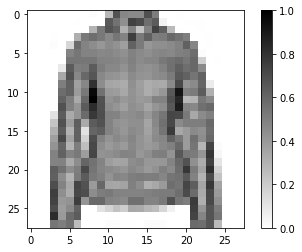

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

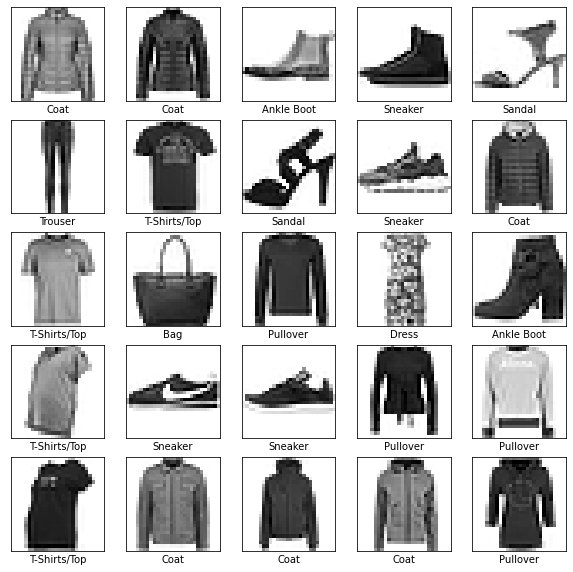

In [ ]:
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()